In [ ]:
!pip install kaggle

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
train_dir = '/content/drive/MyDrive/Train'
test_dir = '/content/drive/MyDrive/Test'

In [ ]:
import os
print(len(os.listdir('/content/drive/MyDrive/Train/Bears')))
print(len(os.listdir('/content/drive/MyDrive/Train/Pandas')))
print(len(os.listdir('/content/drive/MyDrive/Test/Bears')))
print(len(os.listdir('/content/drive/MyDrive/Test/Pandas')))

250
250
50
50


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = resnet_model.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3
13/13 [==============================] - 191s 14s/step - loss: 2.7818 - accuracy: 0.5925 - val_loss: 0.5971 - val_accuracy: 0.8300
Epoch 2/3
13/13 [==============================] - 157s 12s/step - loss: 0.3915 - accuracy: 0.8475 - val_loss: 0.2709 - val_accuracy: 0.8800
Epoch 3/3
13/13 [==============================] - 154s 12s/step - loss: 0.1327 - accuracy: 0.9550 - val_loss: 0.1062 - val_accuracy: 0.9400


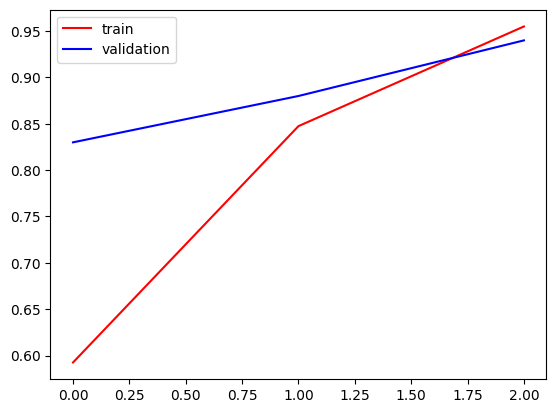

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

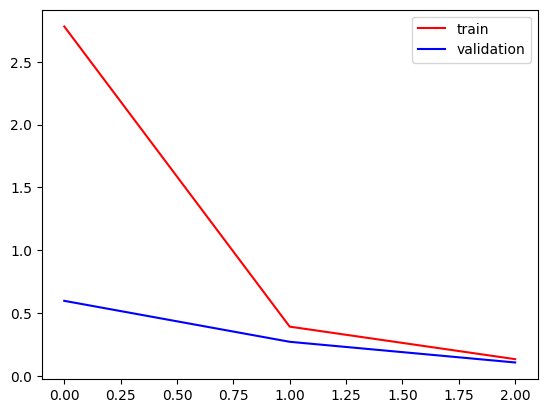

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 100 images belonging to 2 classes.


In [ ]:
predictions = resnet_model.predict(test_data)
print(predictions)

4/4 [==============================] - 30s 6s/step
[[1.91147742e-03]
 [9.89704669e-01]
 [6.83147237e-02]
 [9.94384944e-01]
 [3.33825056e-03]
 [2.00579558e-02]
 [9.99869287e-01]
 [5.62615506e-03]
 [9.93270099e-01]
 [5.36516868e-03]
 [2.25184573e-04]
 [3.22253065e-04]
 [9.99593914e-01]
 [9.99998927e-01]
 [9.98731077e-01]
 [2.07187259e-03]
 [1.31957576e-01]
 [1.37602794e-03]
 [9.99994755e-01]
 [6.48958783e-04]
 [4.11810219e-01]
 [6.59972196e-03]
 [8.13752704e-04]
 [9.99953806e-01]
 [9.99975026e-01]
 [5.11681370e-04]
 [9.26537156e-01]
 [9.93688762e-01]
 [9.76223409e-01]
 [3.55552435e-02]
 [3.02197970e-02]
 [7.60890543e-01]
 [9.99182284e-01]
 [3.40483827e-03]
 [1.24012306e-03]
 [7.39379146e-04]
 [1.35786808e-03]
 [5.13967010e-04]
 [1.97611526e-02]
 [1.02653652e-02]
 [3.24910483e-03]
 [4.13257862e-03]
 [7.04258622e-04]
 [9.99972641e-01]
 [6.10478893e-02]
 [9.97400165e-01]
 [9.89896417e-01]
 [5.27564436e-04]
 [9.75489497e-01]
 [9.99967635e-01]
 [9.75078166e-01]
 [9.99999523e-01]
 [9.99537706e

In [ ]:
len(predictions)

100

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[30 20]
 [23 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.60      0.58        50
           1       0.57      0.54      0.56        50

    accuracy                           0.57       100
   macro avg       0.57      0.57      0.57       100
weighted avg       0.57      0.57      0.57       100



In [8]:
train_dir = '/content/drive/MyDrive/Train'
test_dir = '/content/drive/MyDrive/Test'

In [10]:
import os
print(len(os.listdir('/content/drive/MyDrive/Train/Bears')))
print(len(os.listdir('/content/drive/MyDrive/Train/Pandas')))
print(len(os.listdir('/content/drive/MyDrive/Test/Bears')))
print(len(os.listdir('/content/drive/MyDrive/Test/Pandas')))

250
250
50
50


In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [1]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [2]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [13]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [14]:
history = model.fit(train_data, epochs=30, validation_data=validation_data)

Epoch 1/30
13/13 [==============================] - 114s 8s/step - loss: 0.7930 - accuracy: 0.6925 - val_loss: 0.1209 - val_accuracy: 1.0000
Epoch 2/30
13/13 [==============================] - 67s 5s/step - loss: 0.0761 - accuracy: 0.9850 - val_loss: 0.0525 - val_accuracy: 0.9800
Epoch 3/30
13/13 [==============================] - 64s 5s/step - loss: 0.0922 - accuracy: 0.9675 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 4/30
13/13 [==============================] - 67s 5s/step - loss: 0.0135 - accuracy: 0.9950 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 5/30
13/13 [==============================] - 66s 5s/step - loss: 7.4912e-04 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 6/30
13/13 [==============================] - 66s 5s/step - loss: 7.8720e-04 - accuracy: 1.0000 - val_loss: 7.9816e-04 - val_accuracy: 1.0000
Epoch 7/30
13/13 [==============================] - 65s 5s/step - loss: 2.1228e-04 - accuracy: 1.0000 - val_loss: 6.2242e-04 - val_accuracy: 1.0000

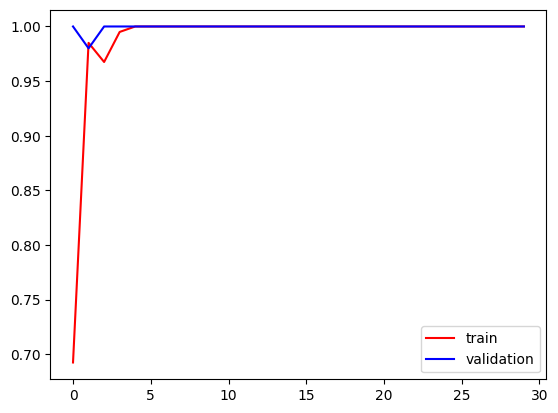

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

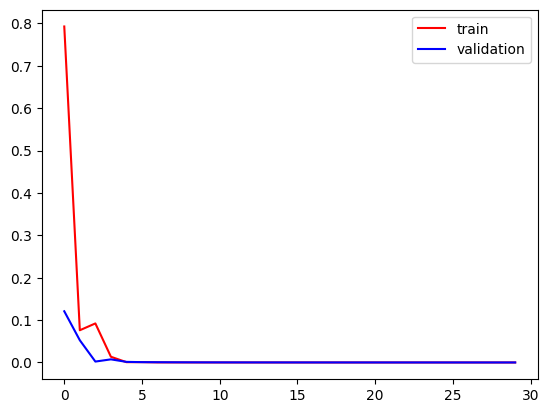

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [17]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 100 images belonging to 2 classes.


In [18]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

4/4 [==============================] - 27s 8s/step
[[2.2096788e-06]
 [1.8741416e-06]
 [1.4990836e-07]
 [1.0000000e+00]
 [9.9999982e-01]
 [9.9999994e-01]
 [9.9999845e-01]
 [2.8816164e-06]
 [4.1260978e-06]
 [9.9999982e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [3.3550214e-06]
 [5.1764675e-07]
 [9.9999803e-01]
 [1.0000000e+00]
 [5.9449320e-08]
 [2.9195655e-06]
 [9.9999869e-01]
 [9.9999732e-01]
 [9.9999791e-01]
 [1.0000000e+00]
 [1.4316955e-06]
 [1.0000000e+00]
 [1.9945337e-06]
 [4.4889439e-06]
 [3.2207853e-07]
 [1.0000000e+00]
 [9.9999988e-01]
 [6.6143272e-08]
 [2.3117263e-07]
 [8.1225508e-08]
 [1.0000000e+00]
 [1.2470129e-07]
 [3.1208338e-06]
 [8.4156653e-07]
 [2.0636153e-06]
 [4.3859518e-07]
 [5.4820339e-06]
 [9.9999934e-01]
 [2.1540200e-04]
 [1.0000000e+00]
 [6.8344357e-06]
 [1.0000000e+00]
 [1.6671463e-07]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [9.9975699e-01]
 [9.9999988e-01]
 [1.5464293e-07]
 [9.9999994e-01]
 [9.9999988e-01]
 [9.9999994e-01]
 [9.9999923e-0

In [19]:
len(predictions)

100

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[25 25]
 [25 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        50
           1       0.50      0.50      0.50        50

    accuracy                           0.50       100
   macro avg       0.50      0.50      0.50       100
weighted avg       0.50      0.50      0.50       100

